In [1]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# use pandas to load data into a DataFrame
# df = pd.read_csv("datasets/train.csv")
# df_test = pd.read_csv("datasets/test.csv")
df = pd.read_csv('preprocessed_datasets/mf_df.csv')
print(df.shape) # (rows, columns)
# print(df_test.shape)

(35970, 40)


In [3]:
target_column = 'DC201'

In [4]:
df.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1.0,11.0,2.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,2.0,1.0,12.0,60.0,1.0
1,2.0,11.0,2.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.000000,1.0,1.0,1.0,2.0,31.0,70.0,1.0
2,3.0,11.0,2.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.000000,1.0,1.0,0.0,4.0,11.0,75.0,1.0
3,6.0,11.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.966636,1.0,0.0,1.0,1.0,11.0,85.0,1.0
4,7.0,11.0,2.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.000000,0.0,1.0,0.0,2.0,11.0,65.0,1.0


In [5]:
df[target_column].replace(to_replace={'Layak Minum':1, 'Tidak Layak Minum':0}, inplace=True)

In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
df.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,11.0,2.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,2.0,1.0,12.0,60.0,1.0
1,11.0,2.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.000000,1.0,1.0,1.0,2.0,31.0,70.0,1.0
2,11.0,2.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.000000,1.0,1.0,0.0,4.0,11.0,75.0,1.0
3,11.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.966636,1.0,0.0,1.0,1.0,11.0,85.0,1.0
4,11.0,2.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.0,1.0,0.0,2.0,11.0,65.0,1.0


In [8]:
# Potability is the target variable, how many of each class are there?
df[target_column].value_counts()

DC201
1.0    32398
0.0     3572
Name: count, dtype: int64

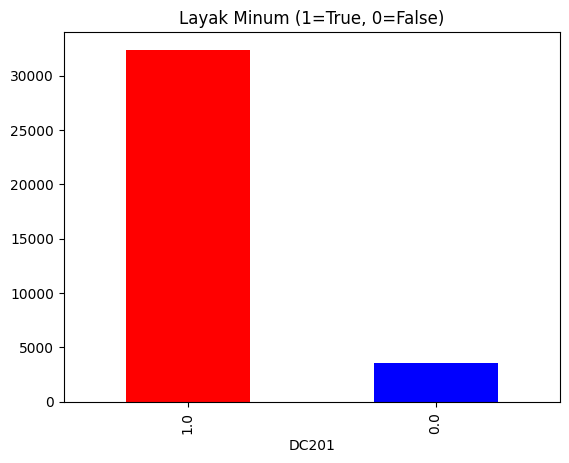

In [9]:
df[target_column].value_counts().plot(kind="bar", color=["red", "blue"], title = "Layak Minum (1=True, 0=False)");

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35970 entries, 0 to 35969
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35970 non-null  float64
 1   DC025   35970 non-null  float64
 2   DC205   35970 non-null  float64
 3   DC206   35970 non-null  float64
 4   DC207   35970 non-null  float64
 5   DC208   35970 non-null  float64
 6   DC209   35970 non-null  float64
 7   DC210   35970 non-null  float64
 8   DC211   35970 non-null  float64
 9   DC212   35970 non-null  float64
 10  DC213   35970 non-null  float64
 11  DC214   35970 non-null  float64
 12  DC215   35970 non-null  float64
 13  DC216   35970 non-null  float64
 14  DC217   35970 non-null  float64
 15  DC219   35970 non-null  float64
 16  DC220   35970 non-null  float64
 17  DC226   35970 non-null  float64
 18  DC230a  35970 non-null  float64
 19  DC230b  35970 non-null  float64
 20  DC232   35970 non-null  float64
 21  DC232b  35970 non-null  float64
 22

In [11]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
count,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,...,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000,35970.000000
mean,43.227634,1.468557,14.986905,0.960042,0.189238,0.846819,0.569364,0.326656,0.758473,0.132558,...,0.198752,1.228330,0.839547,0.366232,0.379530,1.207004,2.699277,15.498886,82.681183,0.900695
std,23.585547,0.499017,6.060391,0.195732,0.391492,0.360093,0.495077,0.468766,0.427870,0.339052,...,0.425286,0.652164,0.368414,0.481771,0.485231,1.227906,1.435696,9.597012,91.142087,0.299075
min,11.000000,1.000000,12.000000,0.000000,-0.020022,0.000000,-0.015008,0.000000,0.000000,-0.118397,...,0.000000,0.997382,0.000000,0.000000,-0.023789,0.000000,1.000000,11.000000,0.000000,0.000000
25%,31.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.874042,0.000000,0.000000,0.000000,1.000000,11.000000,42.000000,1.000000
50%,35.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,11.000000,63.000000,1.000000
75%,64.000000,2.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,96.000000,1.000000
max,94.000000,2.000000,96.000000,1.035794,1.000000,1.020765,1.000000,1.000000,1.028036,1.000000,...,8.000000,6.000000,2.011560,1.000000,1.000000,4.000000,5.000000,96.000000,998.000000,1.000000


In [12]:
df.nunique()

DC024        34
DC025         2
DC205        16
DC206        23
DC207        45
DC208        15
DC209        20
DC210        43
DC211        26
DC212        26
DC213        87
DC214        24
DC215        26
DC216        54
DC217         6
DC219         2
DC220        88
DC226        17
DC230a       16
DC230b     3011
DC232      3026
DC232b     3026
DC235     10447
DC237        22
DC237a       38
DC237b       38
DC237c       38
DC237d       38
DC237e       38
DC237f       38
DC241       616
DC242      5376
DC244         6
DC246        11
DC252        19
DC270a        5
DC109        19
DC142a      414
DC201         2
dtype: int64

In [13]:
df.isna().sum() # dari sini juga terlihat

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC235     0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC242     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
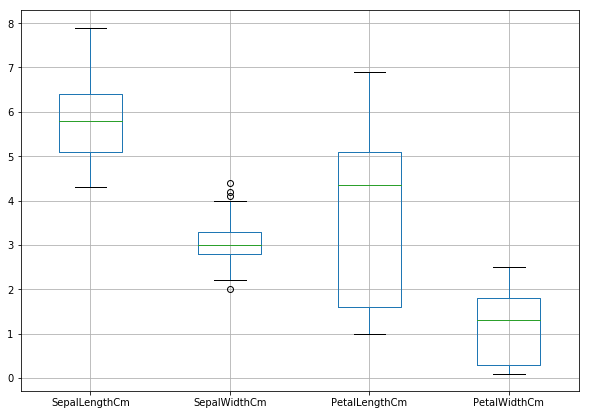

In [14]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['DC024',
 'DC025',
 'DC205',
 'DC206',
 'DC207',
 'DC208',
 'DC209',
 'DC210',
 'DC211',
 'DC212',
 'DC213',
 'DC214',
 'DC215',
 'DC216',
 'DC217',
 'DC219',
 'DC220',
 'DC226',
 'DC230a',
 'DC230b',
 'DC232',
 'DC232b',
 'DC235',
 'DC237',
 'DC237a',
 'DC237b',
 'DC237c',
 'DC237d',
 'DC237e',
 'DC237f',
 'DC241',
 'DC242',
 'DC244',
 'DC246',
 'DC252',
 'DC270a',
 'DC109',
 'DC142a']

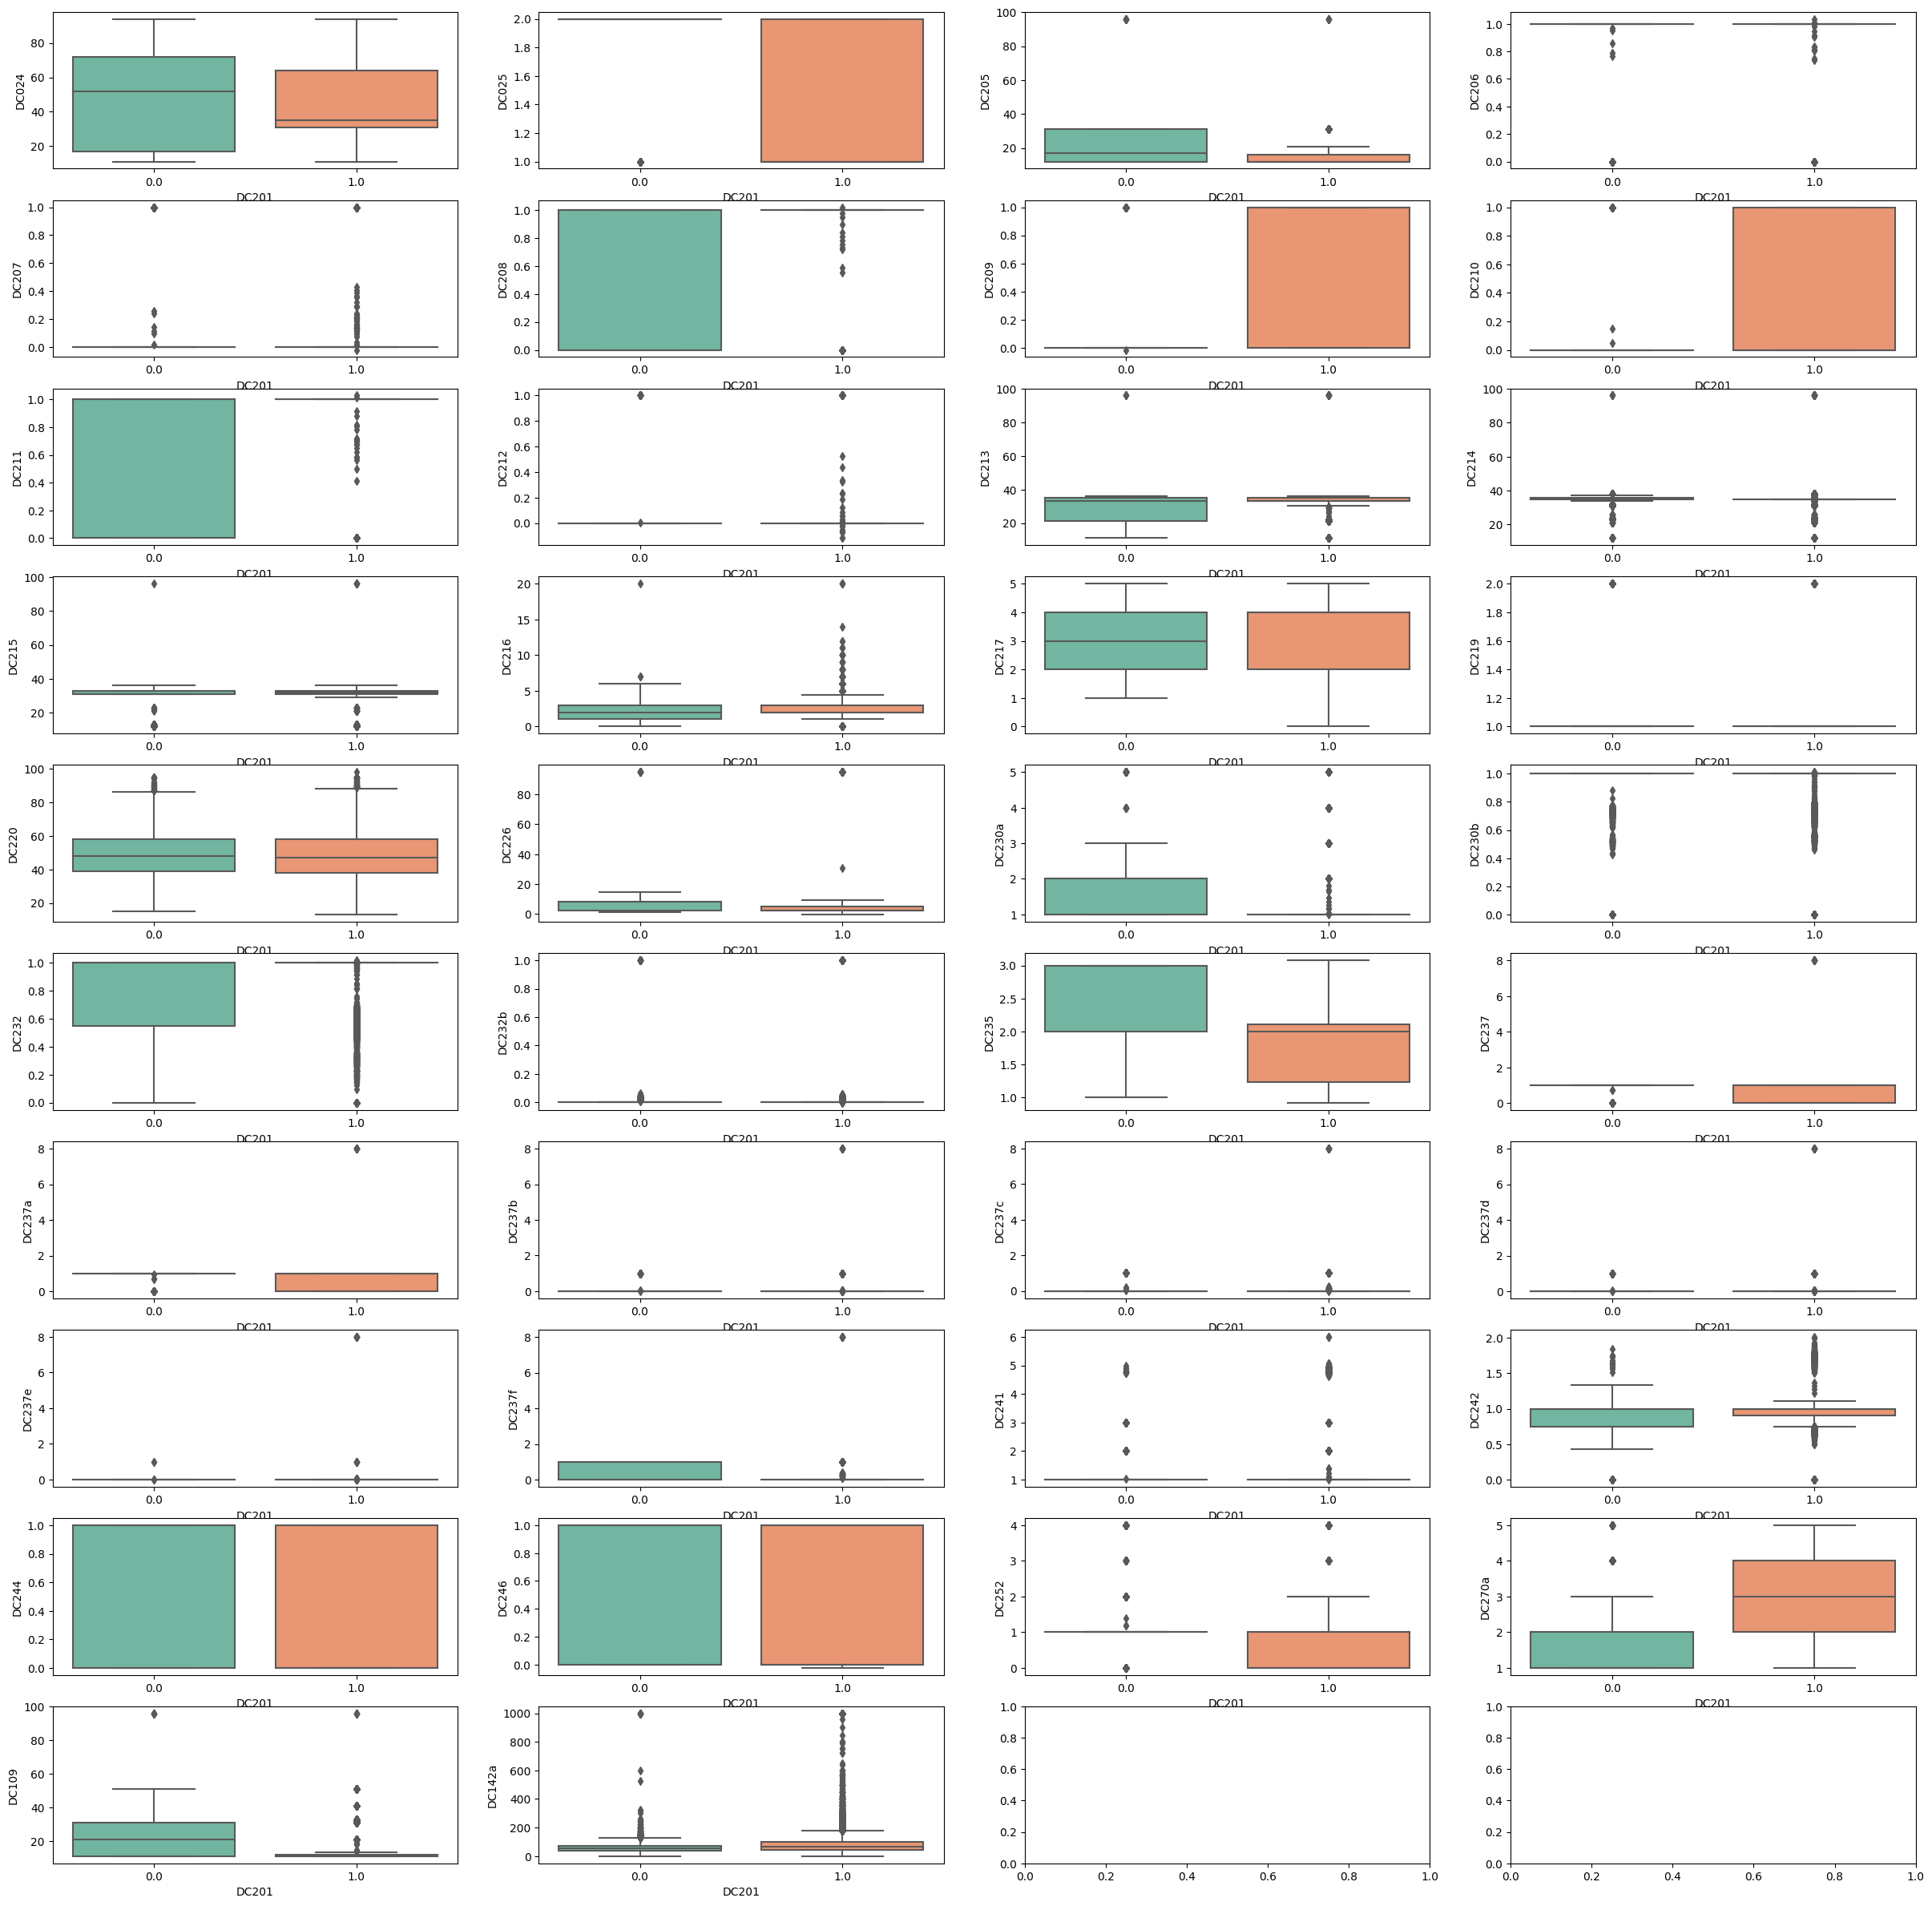

In [15]:
row, col = 10, 4
fig, axes = plt.subplots(row, col, figsize=(30, 30))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

### Distribusi data setiap fitur dengan histograms

In [16]:
target_list = df[target_column].value_counts()
target_list = target_list.index.tolist()
target_list

[1.0, 0.0]

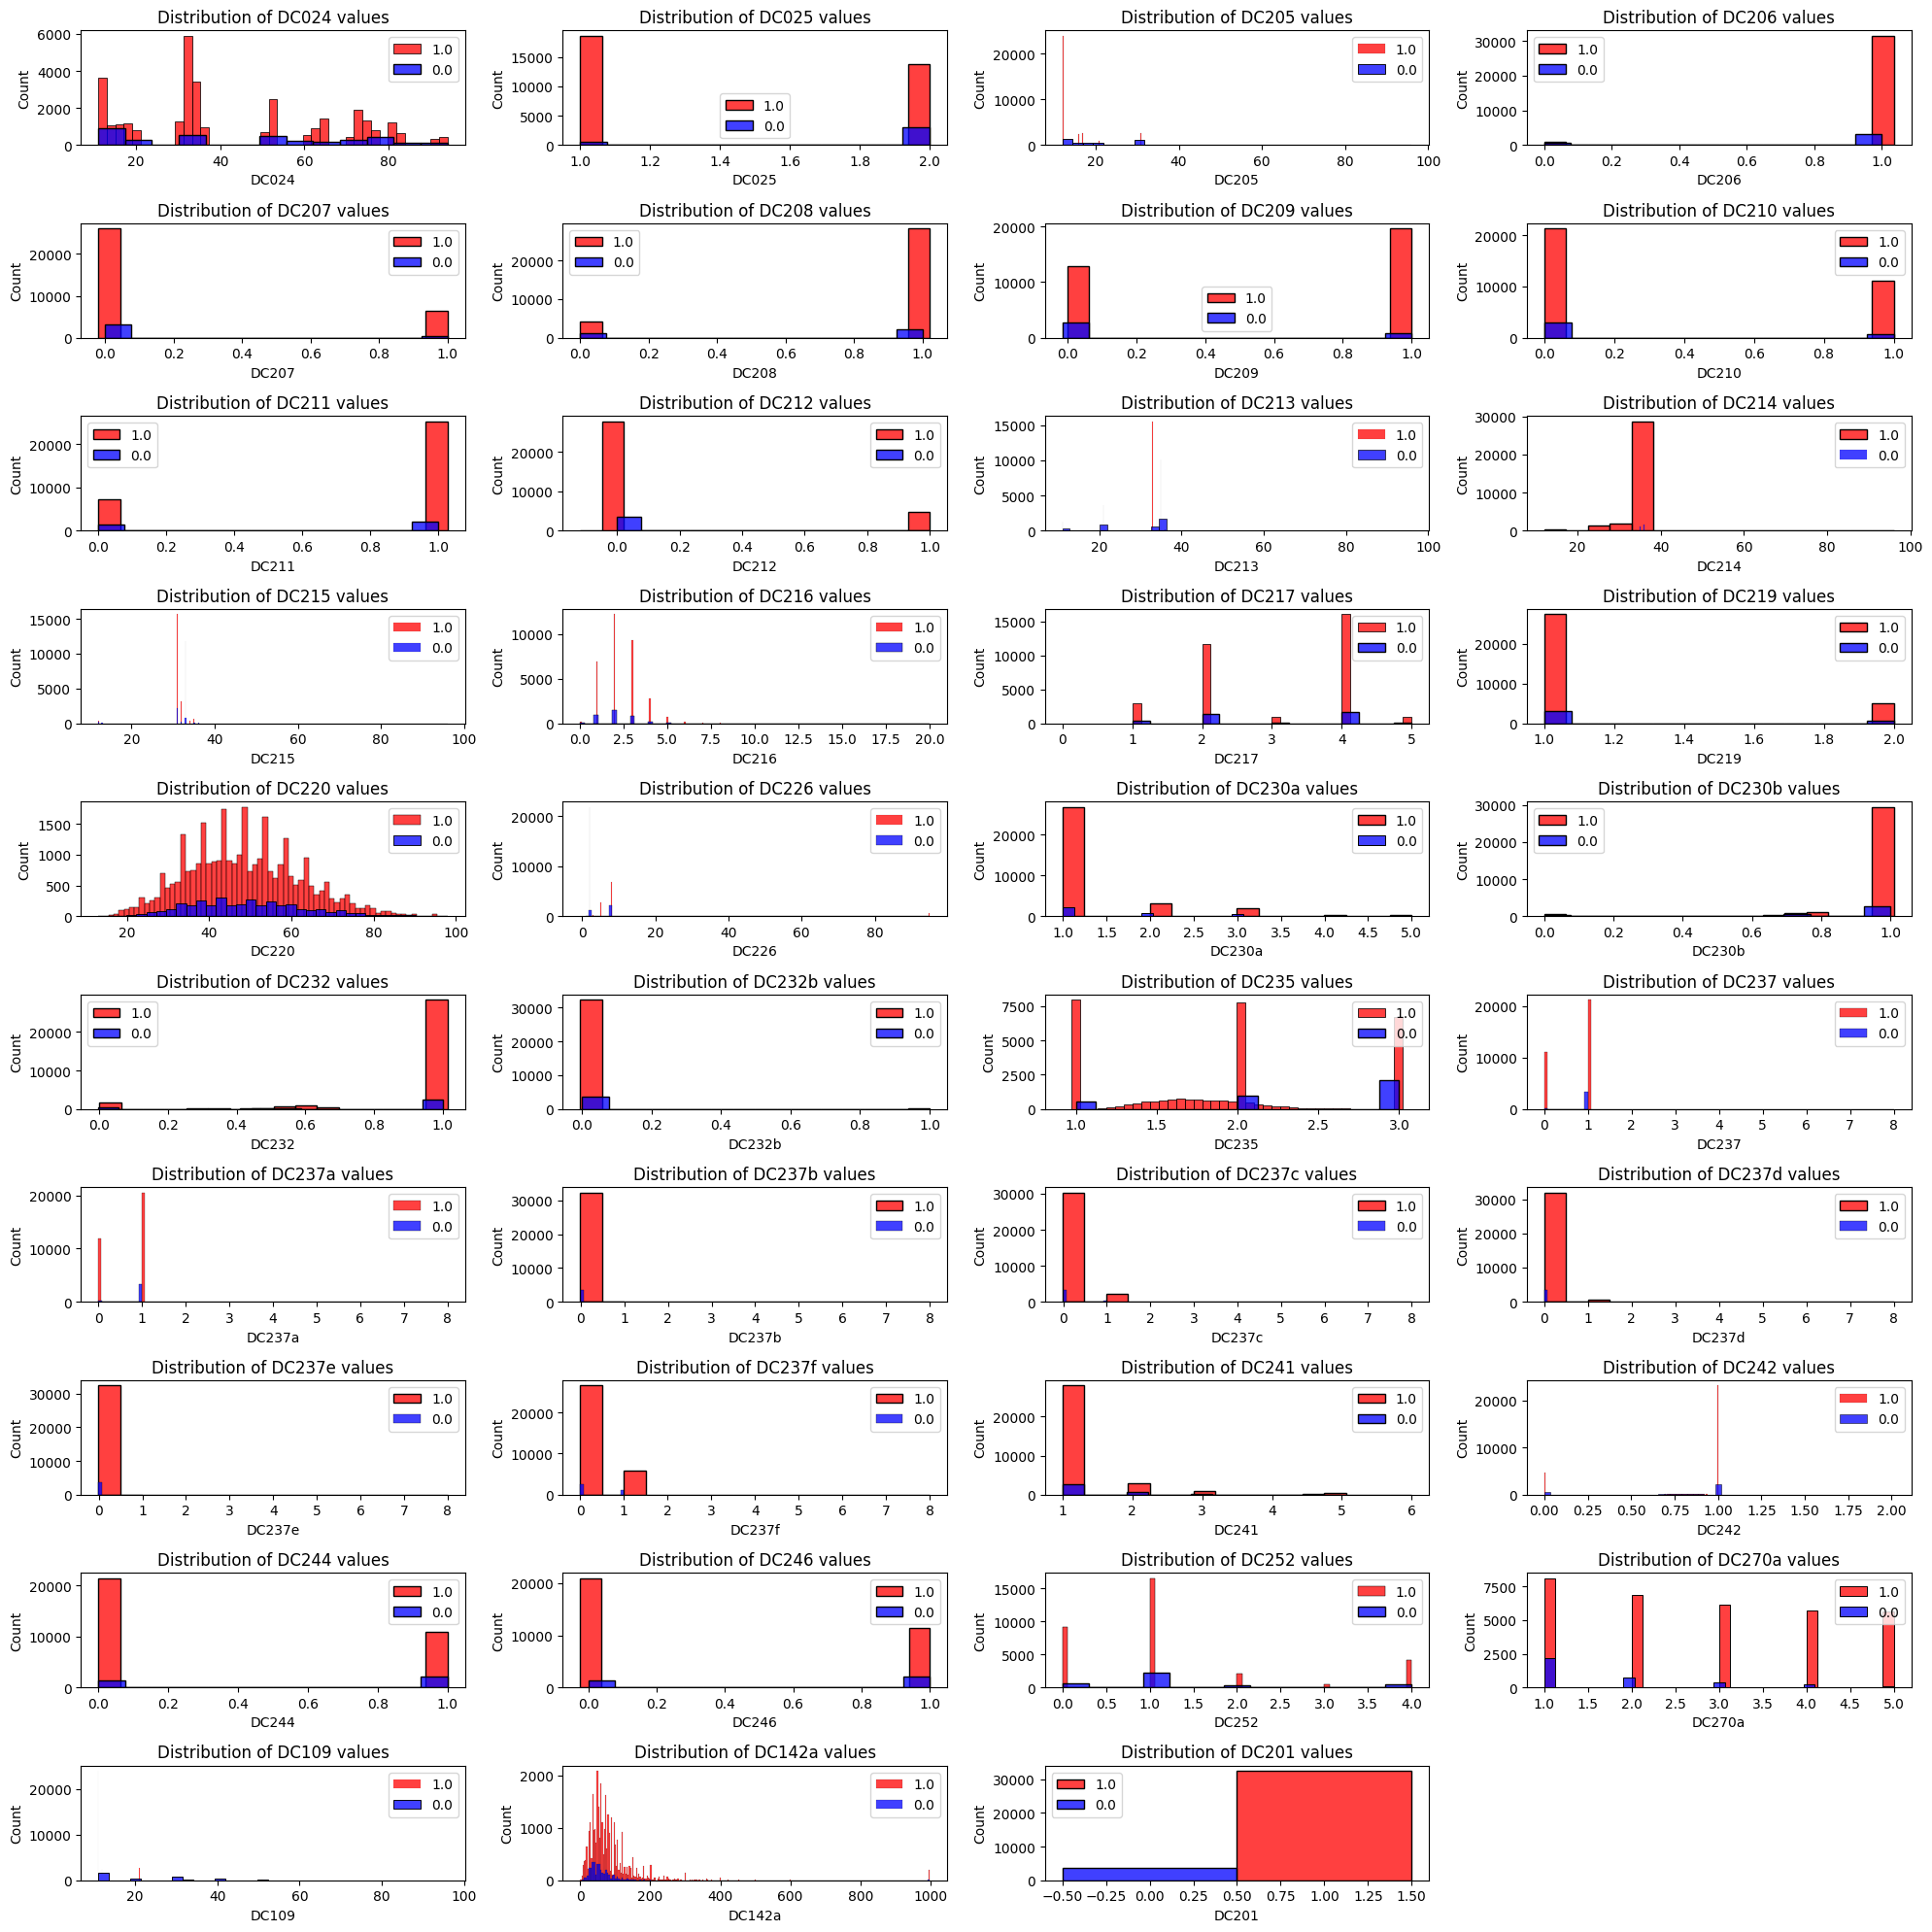

In [17]:
# Distribution of features

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

# colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']
colors = ['red', 'blue']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:39]):
    plt.subplot(10,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

In [18]:
# sns.pairplot(df, hue=target_column)

### Correlation Matrix

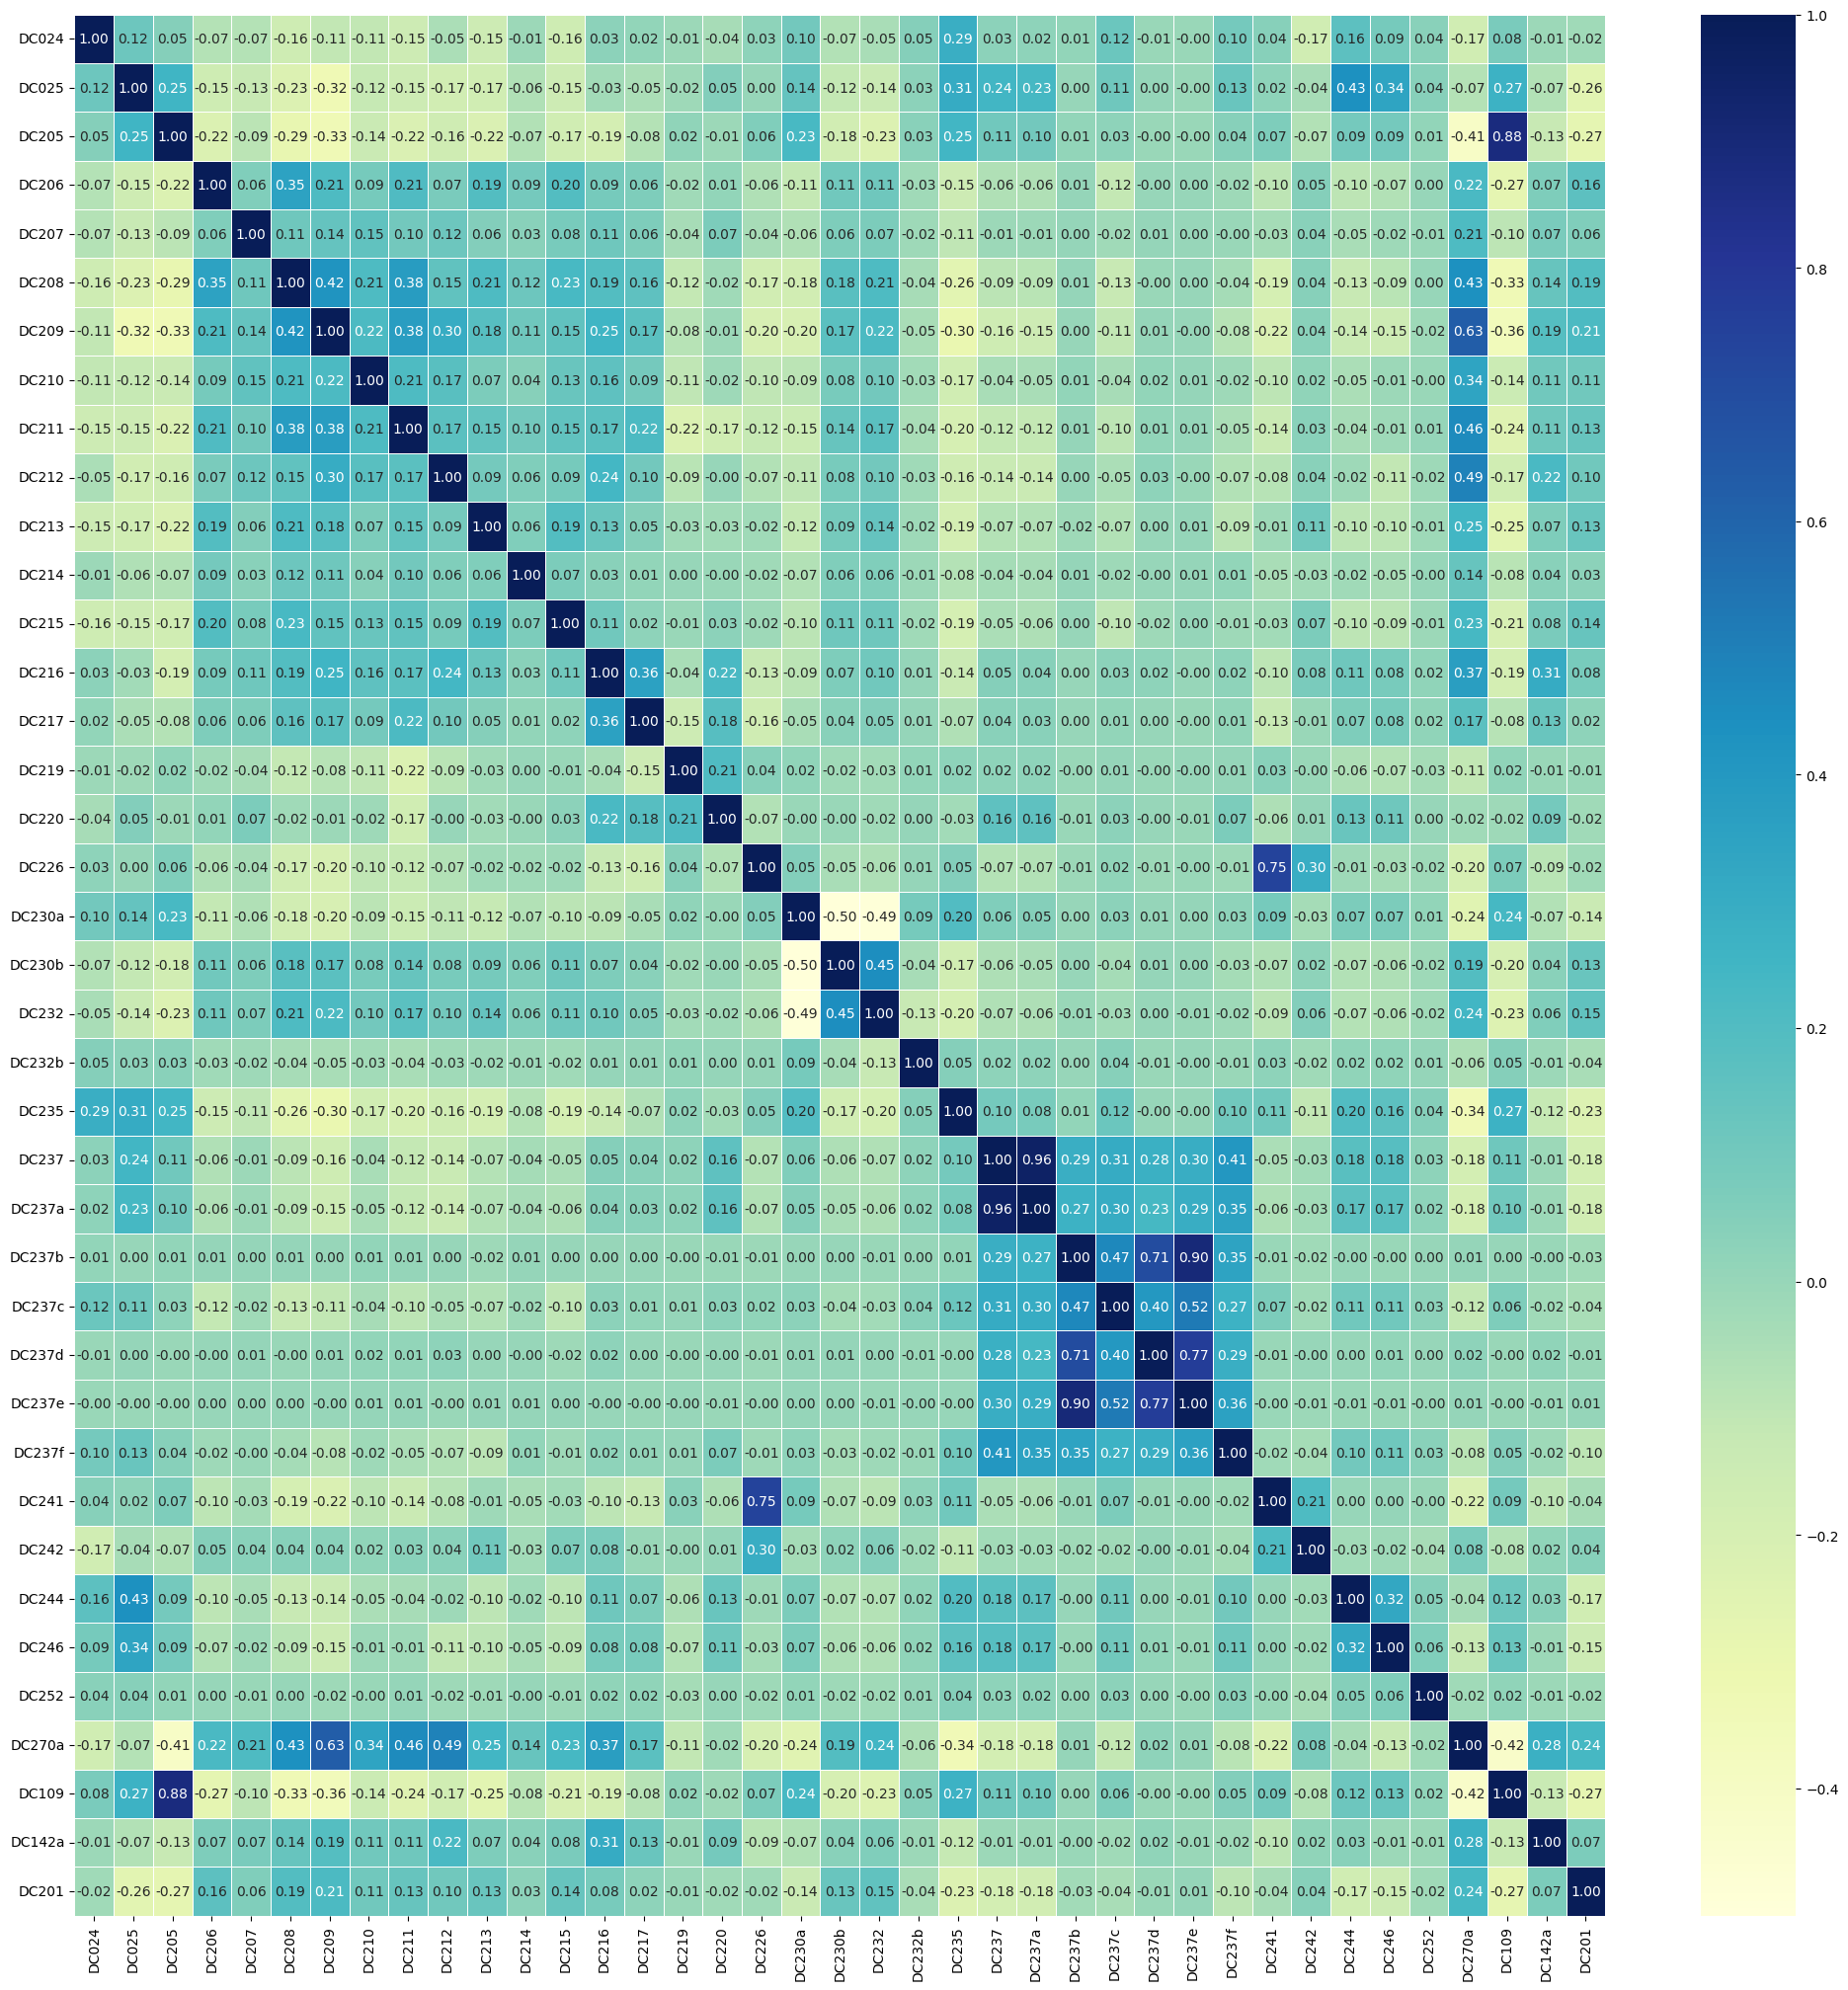

In [19]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## Feature Importance (do after imputation)

In [20]:
from sklearn.model_selection import train_test_split

y = np.array(df[target_column])
df_dropped = df.drop(target_column, axis=1) # drop target
X = np.array(df_dropped)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### mean decrease in impurity

In [22]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


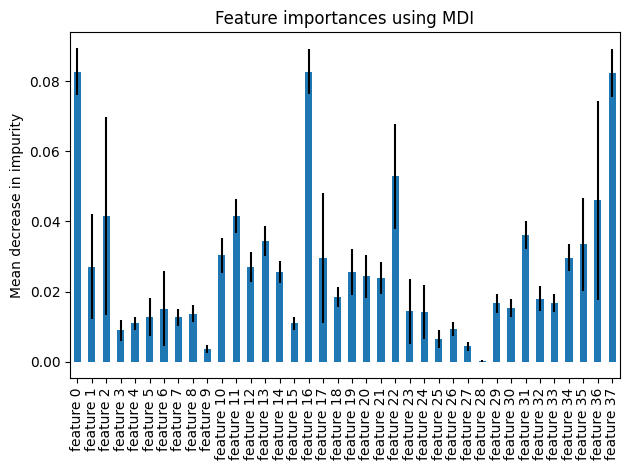

In [23]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature 0, 2, 11, 16, 22, 36, 37

In [35]:
important_features_df = df.iloc[:, [0,2,11,16,22,36,37]]
important_features_df

,DC024,DC205,DC214,DC220,DC235,DC109,DC142a
0,11.0,16.0,36.0,80.0,1.000000,12.0,60.0
1,11.0,31.0,36.0,44.0,1.000000,31.0,70.0
2,11.0,12.0,36.0,35.0,1.000000,11.0,75.0
3,11.0,12.0,36.0,79.0,1.000000,11.0,85.0
4,11.0,12.0,36.0,37.0,1.000000,11.0,65.0
...,...,...,...,...,...,...,...
35965,94.0,17.0,24.0,21.0,3.000000,21.0,9.0
35966,94.0,12.0,32.0,41.0,1.951290,11.0,12.0
35967,94.0,12.0,24.0,52.0,2.073468,11.0,48.0
35968,94.0,12.0,32.0,58.0,1.969629,11.0,39.0


In [36]:
important_features_df.loc[:, [target_column]] = df.loc[:, [target_column]].values
important_features_df

,DC024,DC205,DC214,DC220,DC235,DC109,DC142a,DC201
0,11.0,16.0,36.0,80.0,1.000000,12.0,60.0,1.0
1,11.0,31.0,36.0,44.0,1.000000,31.0,70.0,1.0
2,11.0,12.0,36.0,35.0,1.000000,11.0,75.0,1.0
3,11.0,12.0,36.0,79.0,1.000000,11.0,85.0,1.0
4,11.0,12.0,36.0,37.0,1.000000,11.0,65.0,1.0
...,...,...,...,...,...,...,...,...
35965,94.0,17.0,24.0,21.0,3.000000,21.0,9.0,1.0
35966,94.0,12.0,32.0,41.0,1.951290,11.0,12.0,1.0
35967,94.0,12.0,24.0,52.0,2.073468,11.0,48.0,1.0
35968,94.0,12.0,32.0,58.0,1.969629,11.0,39.0,1.0


In [37]:
important_features_df.to_csv('preprocessed_datasets/important_features.csv', index=False)

### feature permutation

In [ ]:
# from sklearn.inspection import permutation_importance

# start_time = time.time()
# result = permutation_importance(
#     forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
# )
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# forest_importances = pd.Series(result.importances_mean, index=feature_names)

: 

: 

In [ ]:
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
# ax.set_title("Feature importances using permutation on full model")
# ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
# plt.show()

# Insights

NaN data

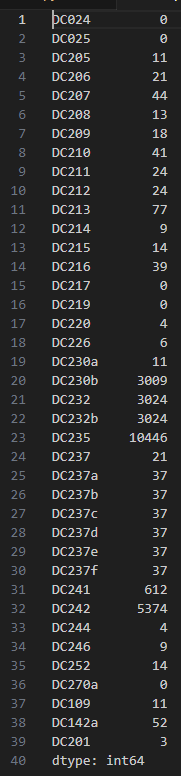

feature importance mean decrease

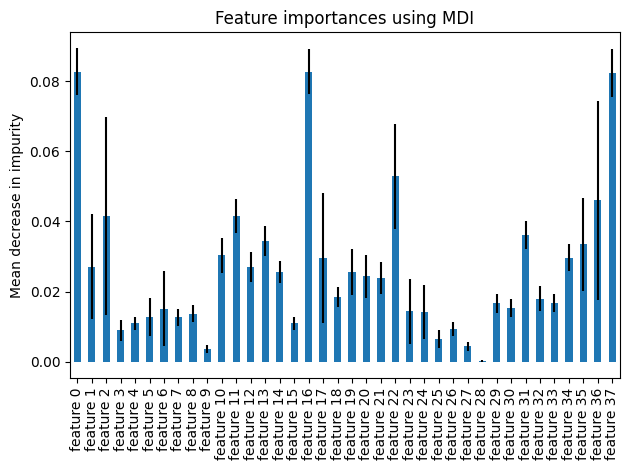

feature importance permutation

OOM